## 2009 ~ 2020년까지 공/사 교육 만족도 그래프

In [478]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '공사 교육환경 만족도/'
file_list = os.listdir(path)
    
file_list_py = [file for file in file_list if file.endswith('.xls')]
file_list_py.sort()

for i in file_list_py:
    if (i == file_list_py[0]) | (i == file_list_py[1]) | (i == file_list_py[2]):
        temp = pd.read_excel('공사 교육환경 만족도/' + i, header=[0,1])
        filt = temp[('대분류','대분류')] == ('종로구')
        idx = int(temp[filt].index.values)
#         print(temp.iloc[idx:,])
        if (i == file_list_py[0]):
            before_edu_df = temp.iloc[idx:,]
        else:
            before_edu_df = before_edu_df.append(temp.iloc[idx:,], ignore_index=True)
    else:
        temp = pd.read_excel('공사 교육환경 만족도/' + i, header=[0,1])
        filt = temp[('대분류','대분류')] == ('종로구')
        idx = int(temp[filt].index.values)
        if( i == file_list_py[3]) :
            after_edu_df = temp.iloc[idx:,]
        else:
            after_edu_df = after_edu_df.append(temp.iloc[idx:,])

                                               

In [479]:
TT = before_edu_df['공교육에 대한 만족도']['10점 평균']
TT.name = '공교육 만족도'
TT2 = before_edu_df['사교육에 대한 만족도']['10점 평균']
TT2.name = '사교육 만족도'

sum_before = [before_edu_df[('기간','기간')],before_edu_df[('대분류','대분류')], TT, TT2]
sum_before[0].rename('기간', inplace=True)
sum_before[1].rename('자치구', inplace=True)
sum_before = pd.DataFrame(sum_before).T

sum_before

,기간,자치구,공교육 만족도,사교육 만족도
0,2009,종로구,4.68,4.81
1,2009,중구,6.17,3.71
2,2009,용산구,4.32,3.59
3,2009,성동구,5.09,3.85
4,2009,광진구,5.4,4.47
...,...,...,...,...
70,2012,관악구,5.57,4.68
71,2012,서초구,5.98,5.43
72,2012,강남구,5.89,5.38
73,2012,송파구,5.7,4.94


In [480]:
after_edu_df

공교육 환경    기간  대분류   분류   사교육 환경                   
   공교육 환경    기간  대분류   분류 교육수준 및 질    비용 사교육 전체   접근성
34   5.21  2013  종로구  종로구      4.2  2.86   3.89  4.63
35   5.95  2013   중구   중구     5.07   4.3    5.1  5.94
36   5.26  2013  용산구  용산구     3.99  3.39   4.06   4.8
37   5.32  2013  성동구  성동구     4.82  3.96   4.64  5.15
38   6.26  2013  광진구  광진구     5.43  4.55    5.1  5.31
..    ...   ...  ...  ...      ...   ...    ...   ...
55   5.35  2020  관악구  관악구        …     …   5.48     …
56   5.39  2020  서초구  서초구        …     …   5.58     …
57   5.16  2020  강남구  강남구        …     …   5.17     …
58   5.41  2020  송파구  송파구        …     …   5.43     …
59   5.55  2020  강동구  강동구        …     …   5.73     …

[200 rows x 8 columns]

In [677]:
data1 = pd.DataFrame(after_edu_df[('기간','기간')].values)
data2 = pd.DataFrame(after_edu_df[('대분류','대분류')].values)
data3 = pd.DataFrame(after_edu_df['공교육 환경']['공교육 환경'].values)
data4 = pd.DataFrame(after_edu_df['사교육 환경']['사교육 전체'].values)


data1.rename(columns = {0:'기간'}, inplace=True)
data2.rename(columns = {0:'자치구'}, inplace=True)
data3.rename(columns = {0:'공교육 만족도'}, inplace=True)
data4.rename(columns = {0:'사교육 만족도'}, inplace=True)

sum_after = pd.concat([data1,data2,data3,data4], axis=1)

data5 = pd.DataFrame(after_edu_df['사교육 환경']['교육수준 및 질'].values)
data6 = pd.DataFrame(after_edu_df['사교육 환경']['비용'].values)
data7 = pd.DataFrame(after_edu_df['사교육 환경']['접근성'].values)

data5.rename(columns = {0:'사교육 수준 만족도'}, inplace=True)
data6.rename(columns = {0:'사교육 비용만족도'}, inplace=True)
data7.rename(columns = {0:'사교육 접근성 만족도'}, inplace=True)


detach_after = pd.concat([data1,data2,data3,data4,data5,data6,data7], axis=1)
# detach_after.replace('…','0',)
detach_after

,기간,자치구,공교육 만족도,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,2013,종로구,5.21,3.89,4.2,2.86,4.63
1,2013,중구,5.95,5.1,5.07,4.3,5.94
2,2013,용산구,5.26,4.06,3.99,3.39,4.8
3,2013,성동구,5.32,4.64,4.82,3.96,5.15
4,2013,광진구,6.26,5.1,5.43,4.55,5.31
...,...,...,...,...,...,...,...
195,2020,관악구,5.35,5.48,…,…,…
196,2020,서초구,5.39,5.58,…,…,…
197,2020,강남구,5.16,5.17,…,…,…
198,2020,송파구,5.41,5.43,…,…,…


In [505]:
sum_df = pd.concat([sum_before, sum_after], ignore_index=True)
sum_df.replace('…',np.nan,inplace=True)
filt2017 = (sum_df['기간'] == 2017)
filt2018 = (sum_df['기간'] == 2018)
Dfilt = detach_after['기간'] == 2017
Dfilt18 = detach_after['기간'] == 2018
for i in sum_df[filt2017].index.values:
    distori = sum_df.iloc[i,1]
    
    for j in detach_after[Dfilt].index.values:
            if (detach_after.iloc[j,1] == distori):              
                sumValue = round(((detach_after.iloc[j,2] + detach_after.iloc[j,3] + detach_after.iloc[j,4]) / 3),2)
                sum_df.iloc[i,3] = sumValue
    
for i in sum_df[filt2018].index.values:
    distori = sum_df.iloc[i,1]
    
    for j in detach_after[Dfilt18].index.values:
            if (detach_after.iloc[j,1] == distori):              
                sumValue = round(((detach_after.iloc[j,2] + detach_after.iloc[j,3] + detach_after.iloc[j,4]) / 3),2)
                sum_df.iloc[i,3] = sumValue
sum_df[filt2018]

,기간,자치구,공교육 만족도,사교육 만족도
200,2018,종로구,NaN,4.72
201,2018,중구,NaN,4.41
202,2018,용산구,NaN,5.48
203,2018,성동구,NaN,5.18
204,2018,광진구,NaN,5.33
205,2018,동대문구,NaN,4.70
206,2018,중랑구,NaN,5.14
207,2018,성북구,NaN,4.89
208,2018,강북구,NaN,4.63
209,2018,도봉구,NaN,4.95


In [506]:
filt = sum_df['자치구'] == '종로구'
sum_df[filt]

,기간,자치구,공교육 만족도,사교육 만족도
0,2009,종로구,4.68,4.81
25,2010,종로구,5.24,4.65
50,2012,종로구,5.71,4.67
75,2013,종로구,5.21,3.89
100,2014,종로구,6.02,5.27
125,2015,종로구,NaN,NaN
150,2016,종로구,5.75,5.46
175,2017,종로구,5.83,5.41
200,2018,종로구,NaN,4.72
225,2019,종로구,5.73,5.52


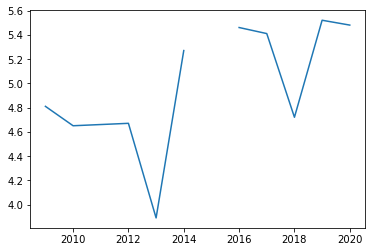

In [508]:
plt.plot(sum_df[filt]['기간'], sum_df[filt]['사교육 만족도'])

2015년 공/사교육, 2018년 공교육의 만족도를 채우기 위해서 서울시 전체와 지역구별 관계 알아볼 필요가 있다.

mice 방법을 활용하여 사교육 공교육/ 사교육 만족도 추정 계획
분리 이전의 데이터 필요하고 행렬 정제 필요 이전 데이터의 행렬 정제 혹은 분리된 데이터 합쳐야함


In [509]:
detach_after

,기간,자치구,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,2013,종로구,4.2,2.86,4.63
1,2013,중구,5.07,4.3,5.94
2,2013,용산구,3.99,3.39,4.8
3,2013,성동구,4.82,3.96,5.15
4,2013,광진구,5.43,4.55,5.31
...,...,...,...,...,...
195,2020,관악구,…,…,…
196,2020,서초구,…,…,…
197,2020,강남구,…,…,…
198,2020,송파구,…,…,…


In [512]:
filt_J = (detach_after['자치구'] == '종로구')
detach_after[filt_J]

,기간,자치구,공교육 만족도,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,2013,종로구,5.21,3.89,4.2,2.86,4.63
25,2014,종로구,6.02,5.27,6.02,3.66,6.14
50,2015,종로구,…,…,…,…,…
75,2016,종로구,5.75,5.46,6.0,4.15,6.21
100,2017,종로구,5.83,…,5.87,4.71,5.64
125,2018,종로구,NaN,…,4.65,4.35,5.16
150,2019,종로구,5.73,5.52,5.78,4.56,6.21
175,2020,종로구,5.23,5.48,…,…,…


In [515]:
nan_after = detach_after.replace('…', np.nan)

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/93571116.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dropyear_df = filt_df.drop(['기간','자치구'],1)


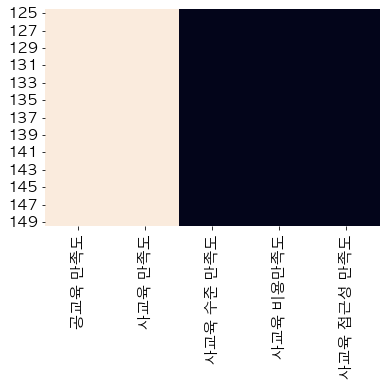

In [1121]:
import seaborn as sns

namelst = nan_after['자치구'].drop_duplicates()
yearlst = nan_after['기간'].drop_duplicates()

for i in yearlst:
    filtyear = (nan_after['기간'] == i)
    
    filt_df = nan_after[filtyear]
    dropyear_df = filt_df.drop(['기간','자치구'],1)
    
    if (i ==2018):
        sns.heatmap(dropyear_df.isnull(), cbar=False)
        
# sns.heatmap(nan_after.isnull(), cbar=False)


In [531]:

filt_J = (nan_after['자치구'] == '종로구')
test=nan_after[filt_J]
test

,기간,자치구,공교육 만족도,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,2013,종로구,5.21,3.89,4.20,2.86,4.63
25,2014,종로구,6.02,5.27,6.02,3.66,6.14
50,2015,종로구,NaN,NaN,NaN,NaN,NaN
75,2016,종로구,5.75,5.46,6.00,4.15,6.21
100,2017,종로구,5.83,NaN,5.87,4.71,5.64
125,2018,종로구,NaN,NaN,4.65,4.35,5.16
150,2019,종로구,5.73,5.52,5.78,4.56,6.21
175,2020,종로구,5.23,5.48,NaN,NaN,NaN


In [519]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [540]:
X = test.drop(['기간','자치구','공교육 만족도'], 1)
Y = test[['기간','자치구','공교육 만족도']]

X

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/935965724.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = test.drop(['기간','자치구','공교육 만족도'], 1)


,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,3.89,4.20,2.86,4.63
25,5.27,6.02,3.66,6.14
50,NaN,NaN,NaN,NaN
75,5.46,6.00,4.15,6.21
100,NaN,5.87,4.71,5.64
125,NaN,4.65,4.35,5.16
150,5.52,5.78,4.56,6.21
175,5.48,NaN,NaN,NaN


In [541]:
X.corr()

,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
사교육 만족도,1.000000,0.969984,0.923401,0.995207
사교육 수준 만족도,0.969984,1.000000,0.562606,0.943465
사교육 비용만족도,0.923401,0.562606,1.000000,0.537535
사교육 접근성 만족도,0.995207,0.943465,0.537535,1.000000


In [568]:
Ir = LinearRegression()

imp = IterativeImputer(estimator = Ir, verbose =2 , max_iter=40, tol=1e-10, imputation_order='ascending')


In [569]:
imp.fit(X)

result = imp.transform(X)
result

[IterativeImputer] Completing matrix with shape (8, 4)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 1.3076975942001416, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 2/40, elapsed time 0.01
[IterativeImputer] Change: 0.0045965657063824494, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 3/40, elapsed time 0.01
[IterativeImputer] Change: 0.004583697700301315, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 4/40, elapsed time 0.02
[IterativeImputer] Change: 0.004570865517266931, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 5/40, elapsed time 0.02
[IterativeImputer] Change: 0.004558069057641667, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 6/40, elapsed time 0.02
[IterativeImputer] Change: 0.0045453082220516805, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 7/40, elapsed time 0.03
[IterativeImpu

/Users/seokholee/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


array([[3.89      , 4.2       , 2.86      , 4.63      ],
       [5.27      , 6.02      , 3.66      , 6.14      ],
       [5.10714286, 5.59425622, 4.05481056, 5.67091187],
       [5.46      , 6.        , 4.15      , 6.21      ],
       [5.41      , 5.87      , 4.71      , 5.64      ],
       [4.72      , 4.65      , 4.35      , 5.16      ],
       [5.52      , 5.78      , 4.56      , 6.21      ],
       [5.48      , 6.63979357, 4.09367391, 5.70638309]])

In [560]:
print(result)
X

[[3.89       4.2        2.86       4.63      ]
 [5.27       6.02       3.66       6.14      ]
 [5.10714286 5.59726595 4.05325976 5.66949444]
 [5.46       6.         4.15       6.21      ]
 [5.41       5.87       4.71       5.64      ]
 [4.72       4.65       4.35       5.16      ]
 [5.52       5.78       4.56       6.21      ]
 [5.48       6.66086162 4.08281833 5.69646106]]


,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,3.89,4.20,2.86,4.63
25,5.27,6.02,3.66,6.14
50,NaN,NaN,NaN,NaN
75,5.46,6.00,4.15,6.21
100,5.41,5.87,4.71,5.64
125,4.72,4.65,4.35,5.16
150,5.52,5.78,4.56,6.21
175,5.48,NaN,NaN,NaN


2015년 전부 결측 -> 사교육 만족도 : 5.10 / 사교육 수준 만족도 : 5.60 / 사교육 비용 만족도 : 4.05 / 사굥규 접근성 만족도 : 5.67  
  
2020년 세부 만족도 결측 - > 사교육 수준 만족도 : 6.66 / 사교육 비용 만족도 : 4.08 / 사교육 접근성 만족도 : 5.70

In [606]:
new_x = pd.DataFrame(result)
new_x.round(2)

y2 = test['공교육 만족도']
y2 = y2.reset_index()


new_x = pd.concat([new_x,y2], axis=1)
new_x = new_x.drop('index',1)
new_x

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2820671573.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_x = new_x.drop('index',1)


,0,1,2,3,공교육 만족도
0,3.890000,4.200000,2.860000,4.630000,5.21
1,5.270000,6.020000,3.660000,6.140000,6.02
2,5.107143,5.594256,4.054811,5.670912,NaN
3,5.460000,6.000000,4.150000,6.210000,5.75
4,5.410000,5.870000,4.710000,5.640000,5.83
5,4.720000,4.650000,4.350000,5.160000,NaN
6,5.520000,5.780000,4.560000,6.210000,5.73
7,5.480000,6.639794,4.093674,5.706383,5.23


In [607]:
new_x.corr()

,0,1,2,3,공교육 만족도
0,1.000000,0.912983,0.761518,0.903991,0.541277
1,0.912983,1.000000,0.488324,0.808338,0.336346
2,0.761518,0.488324,1.000000,0.537865,0.469061
3,0.903991,0.808338,0.537865,1.000000,0.712390
공교육 만족도,0.541277,0.336346,0.469061,0.712390,1.000000


In [610]:
new_xx = new_x.drop([1,2],1)
new_xx

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/4180823005.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_xx = new_x.drop([1,2],1)


,0,3,공교육 만족도
0,3.890000,4.630000,5.21
1,5.270000,6.140000,6.02
2,5.107143,5.670912,NaN
3,5.460000,6.210000,5.75
4,5.410000,5.640000,5.83
5,4.720000,5.160000,NaN
6,5.520000,6.210000,5.73
7,5.480000,5.706383,5.23


In [612]:
new_xx.corr()

,0,3,공교육 만족도
0,1.000000,0.903991,0.541277
3,0.903991,1.000000,0.712390
공교육 만족도,0.541277,0.712390,1.000000


In [615]:
imp.fit(new_xx)

print(new_xx)
imp.transform(new_xx)


[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.260777053011398, scaled tolerance: 6.21e-10 
[IterativeImputer] Ending imputation round 2/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.21e-10 
[IterativeImputer] Early stopping criterion reached.
          0         3  공교육 만족도
0  3.890000  4.630000     5.21
1  5.270000  6.140000     6.02
2  5.107143  5.670912      NaN
3  5.460000  6.210000     5.75
4  5.410000  5.640000     5.83
5  4.720000  5.160000      NaN
6  5.520000  6.210000     5.73
7  5.480000  5.706383     5.23
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00


array([[3.89      , 4.63      , 5.21      ],
       [5.27      , 6.14      , 6.02      ],
       [5.10714286, 5.67091187, 5.59107947],
       [5.46      , 6.21      , 5.75      ],
       [5.41      , 5.64      , 5.83      ],
       [4.72      , 5.16      , 5.36755628],
       [5.52      , 6.21      , 5.73      ],
       [5.48      , 5.70638309, 5.23      ]])

공교육 만족도 결측값 2015 -> 5.59 / 2018 -> 5.36

## 전처리 과정  
  
모든 자치구 정보를 가져온 데이터 프레임  
->자치구 별로 나누는 작업을 진행  
->자치구 별로 나뉜 후 17,18년 사교육 평균 계산해서 넣어주기  
->평균이 계산된 데이터프레임으로 결측치인 15년(사교육 모든자료) + 20년(사교육 세부자료) 결측치 계산 진행  
->계산된 결측치 배열을 데이터프레임으로 바꾸고 공교육 행 추가  
->선형관계가 깊은 사교육 평균과 사교육 접근성과 공교육 점수만 있는 데이터프레임  
->3가지 요소만 있는 데이터프레임으로 15년 18년 공교육 결측치 예상  
  
의문점? 공교육 결츨치 처리가 선형관계가 깊은 사교육 평균과 사교육 접근성으로 처리해도 괜찮은가?

In [722]:
#원본 자료 복사
X = detach_after

# 데이터처리 위해서 ... -> 결측치로 변경
X.replace('…',np.nan,inplace=True)

#자치구 임시 저장
temp = X['자치구']


In [723]:
#중복 자치구명 제거
dropfor = temp.drop_duplicates()
X

,기간,자치구,공교육 만족도,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
0,2013,종로구,5.21,3.90,4.20,2.86,4.63
1,2013,중구,5.95,5.10,5.07,4.30,5.94
2,2013,용산구,5.26,4.06,3.99,3.39,4.80
3,2013,성동구,5.32,4.64,4.82,3.96,5.15
4,2013,광진구,6.26,5.10,5.43,4.55,5.31
...,...,...,...,...,...,...,...
195,2020,관악구,5.35,5.48,NaN,NaN,NaN
196,2020,서초구,5.39,5.58,NaN,NaN,NaN
197,2020,강남구,5.16,5.17,NaN,NaN,NaN
198,2020,송파구,5.41,5.43,NaN,NaN,NaN


In [832]:
#기간 설정을 하지 않아서 모든 년도 사교육 만족도 평균을 재계산해서 대입하였음. 자료가 많지 않아서 년도 분리작업 하지 않음.
#filt17 = (X['기간'] == 2017)
#filt18 = (X['기간'] == 2018)

for i in dropfor:
    filt_distori = (X['자치구'] == i)
    
    for j in X[filt_distori].index.values:
        if(X.iloc[j,4:].isnull().values.any() == False):
            X.iloc[j,3] = round((X.iloc[j,4] + X.iloc[j,5] + X.iloc[j,6]) / 3 , 2)


In [833]:
#15년, 20년 결측치 예측 후 자치구 년도별 사교육 점수를 result에 저장
for i in dropfor:
    filt_distori = (X['자치구'] == i)
    
    xxx = X[filt_distori]
    xxxx = xxx.drop(['기간','자치구','공교육 만족도'],1 )
    copy_xxxx = xxxx.copy()
    copy_xxxx.reset_index(inplace=True)
    copy_xxxx.drop('index',1, inplace=True)
    imp.fit(xxxx)
    result = imp.transform(xxxx)
    
    result_df = pd.DataFrame(result).round(2)
#     for j in xxxx.index.values:
    fix = copy_xxxx[copy_xxxx['사교육 수준 만족도'].isnull()].index.values
    for k in range(0,len(fix)):
        X.iloc[xxxx.index.values[fix[k]],3:] = result_df.iloc[fix[k],:]



/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xxxx = xxx.drop(['기간','자치구','공교육 만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_xxxx.drop('index',1, inplace=True)
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xxxx = xxx.drop(['기간','자치구','공교육 만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_xxxx.drop('in

[IterativeImputer] Completing matrix with shape (8, 4)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.03
[IterativeImputer] Change: 0.0, scaled tolerance: 6.63e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 4)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (8, 4)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.43e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 4)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (8, 4)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.360000000000001e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix wit

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xxxx = xxx.drop(['기간','자치구','공교육 만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_xxxx.drop('index',1, inplace=True)
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xxxx = xxx.drop(['기간','자치구','공교육 만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/1462246048.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_xxxx.drop('in

In [ ]:
#2020년 추정에 15년 결측치가 방해 되는지 확인을 위함
#결과 : 15년도 결측치 포함해서 진행 해도무방

# for i in dropfor:
#     filt_distori = (X['자치구'] == i)
    
#     xxx = X[filt_distori]
#     xxxx = xxx.drop(['기간','자치구','공교육 만족도'],1 )
#     xxxx.dropna(how='all',inplace=True,axis=0)
#     imp.fit(xxxx)
#     result = imp.transform(xxxx)
#     print(i, result)

In [834]:
X[X['기간']==2018]

,기간,자치구,공교육 만족도,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
125,2018,종로구,NaN,4.72,4.65,4.35,5.16
126,2018,중구,NaN,4.41,4.40,4.21,4.63
127,2018,용산구,NaN,5.48,5.92,4.18,6.33
128,2018,성동구,NaN,5.18,5.67,3.92,5.94
129,2018,광진구,NaN,5.33,5.83,4.28,5.89
130,2018,동대문구,NaN,4.70,5.07,4.08,4.96
131,2018,중랑구,NaN,5.14,5.53,4.19,5.70
132,2018,성북구,NaN,4.89,5.31,4.23,5.14
133,2018,강북구,NaN,4.63,4.62,4.41,4.85
134,2018,도봉구,NaN,4.95,5.23,4.27,5.36


# 공교육 만족도 결측치 처리 (15, 18년)
공교육 만족도는 [사교육 만족도, 사교육 접근성 만족도]를 사용하여 결측치 예상 

In [927]:
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 '-' 글자 깨짐 현상 해결

In [928]:
#15년, 20년 결측치 예측 후 자치구 년도별 사교육 점수를 result에 저장
for i in dropfor:
    filt_distori = (X['자치구'] == i)
    
    yyy = X[filt_distori]
    yyyy = yyy.drop(['기간','자치구','사교육 수준 만족도','사교육 비용만족도'],1 )
    copy_yyyy = yyyy.copy()
    copy_yyyy.reset_index(inplace=True)
    copy_yyyy.drop('index',1, inplace=True)
    
    imp.fit(yyyy)
    result = imp.transform(yyyy)
    
    result_df = pd.DataFrame(result).round(2)



    fix = copy_yyyy[copy_yyyy['공교육 만족도'].isnull()].index.values
    for k in range(0,len(fix)):
        X.iloc[[yyyy.index.values[fix[k]],],2] = result_df.iloc[fix[k],0]

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  yyyy = yyy.drop(['기간','자치구','사교육 수준 만족도','사교육 비용만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_yyyy.drop('index',1, inplace=True)
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  yyyy = yyy.drop(['기간','자치구','사교육 수준 만족도','사교육 비용만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be key

[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.10
[IterativeImputer] Change: 0.0, scaled tolerance: 6.21e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 5.95e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.33e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 3

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  yyyy = yyy.drop(['기간','자치구','사교육 수준 만족도','사교육 비용만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_yyyy.drop('index',1, inplace=True)
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  yyyy = yyy.drop(['기간','자치구','사교육 수준 만족도','사교육 비용만족도'],1 )
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be key

[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.400000000000001e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.39e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (8, 3)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 6.33e-10 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix wit

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_5002/2573822705.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  copy_yyyy.drop('index',1, inplace=True)


In [847]:
X[X['기간']==2018]

,기간,자치구,공교육 만족도,사교육 만족도,사교육 수준 만족도,사교육 비용만족도,사교육 접근성 만족도
125,2018,종로구,5.37,4.72,4.65,4.35,5.16
126,2018,중구,5.29,4.41,4.40,4.21,4.63
127,2018,용산구,5.60,5.48,5.92,4.18,6.33
128,2018,성동구,5.51,5.18,5.67,3.92,5.94
129,2018,광진구,5.25,5.33,5.83,4.28,5.89
130,2018,동대문구,5.17,4.70,5.07,4.08,4.96
131,2018,중랑구,5.14,5.14,5.53,4.19,5.70
132,2018,성북구,4.37,4.89,5.31,4.23,5.14
133,2018,강북구,6.66,4.63,4.62,4.41,4.85
134,2018,도봉구,5.11,4.95,5.23,4.27,5.36


In [848]:
X.isnull().sum()

기간             0
자치구            0
공교육 만족도        0
사교육 만족도        0
사교육 수준 만족도     0
사교육 비용만족도      0
사교육 접근성 만족도    0
dtype: int64

In [855]:
X.to_csv('seoul_satifi.csv', encoding='utf-8-sig')

## 사교육 만족도 최상/최하 점수 및 최상3/최하3 자치구 선별작업

In [1141]:
tempyear = X['기간']
yearD = tempyear.drop_duplicates()

yearmax = []
yearmin = []

topGu = []
botGu = []

for i in yearD:
    filtyear = (X['기간'] == i)
    
    yearmax.append(X[filtyear]['사교육 만족도'].max())
    yearmin.append(X[filtyear]['사교육 만족도'].min())
    
    top3 = X[filtyear].sort_values(by='사교육 만족도', ascending=False).head(3)
    bot3 = X[filtyear].sort_values(by='사교육 만족도', ascending=True).head(3)
    
    for j in range(0, 3):
        topGu.append(top3.iloc[j]['자치구'])
        botGu.append(bot3.iloc[j]['자치구'])
        print(top3.iloc[j])
        


기간             2013
자치구             서초구
공교육 만족도        6.43
사교육 만족도        6.71
사교육 수준 만족도     7.01
사교육 비용만족도      5.92
사교육 접근성 만족도     7.2
Name: 21, dtype: object
기간             2013
자치구             강남구
공교육 만족도        6.05
사교육 만족도        5.77
사교육 수준 만족도     6.08
사교육 비용만족도      4.57
사교육 접근성 만족도    6.66
Name: 22, dtype: object
기간             2013
자치구             동작구
공교육 만족도        6.22
사교육 만족도        5.73
사교육 수준 만족도     5.95
사교육 비용만족도      5.08
사교육 접근성 만족도    6.15
Name: 19, dtype: object
기간             2014
자치구             강남구
공교육 만족도        6.49
사교육 만족도        5.71
사교육 수준 만족도     6.12
사교육 비용만족도      4.49
사교육 접근성 만족도    6.51
Name: 47, dtype: object
기간             2014
자치구             양천구
공교육 만족도        6.14
사교육 만족도        5.46
사교육 수준 만족도     5.75
사교육 비용만족도      4.43
사교육 접근성 만족도    6.19
Name: 39, dtype: object
기간             2014
자치구             강동구
공교육 만족도        6.17
사교육 만족도        5.35
사교육 수준 만족도      5.7
사교육 비용만족도      4.49
사교육 접근성 만족도    5.86
Name: 49, dtype: object
기간             2

## 사교육 전체 만족도 상위 하위 그룹 보기

In [1020]:
tempGu = X['자치구']
Gu = tempGu.drop_duplicates()

print('TOP3')
for i in Gu:
    if(topGu.count(i)):
        print(i, ' : ', topGu.count(i))
        
print('\nBOT3')

for i in Gu:
    if(botGu.count(i)):
        print(i, ' : ', botGu.count(i))

TOP3
종로구  :  1
성동구  :  1
서대문구  :  1
양천구  :  1
금천구  :  1
영등포구  :  1
동작구  :  2
서초구  :  4
강남구  :  6
송파구  :  3
강동구  :  3

BOT3
종로구  :  1
중구  :  4
용산구  :  1
성동구  :  1
성북구  :  1
강북구  :  2
노원구  :  1
은평구  :  1
마포구  :  1
강서구  :  4
구로구  :  1
금천구  :  4
동작구  :  1
강남구  :  1


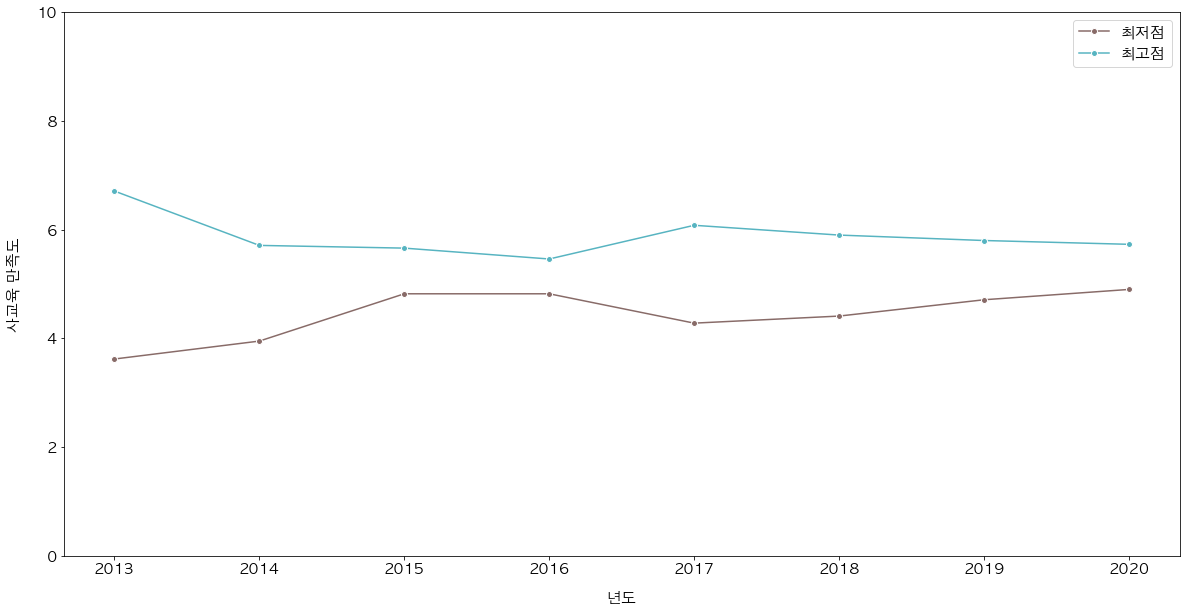

In [1132]:
plt.figure(figsize=(20,10))

plt.plot(yearD, yearmin, label = '최저점', marker='o', mec='w',color='#886b68')
plt.plot(yearD, yearmax, label = '최고점', marker='o', mec='w',color='#57b4c1')

plt.legend()
plt.ylim(0,10)
plt.ylabel('사교육 만족도', labelpad=15)
plt.xlabel('년도', labelpad=15)
plt.savefig('1st_end_score_plot.png', dpi=300)

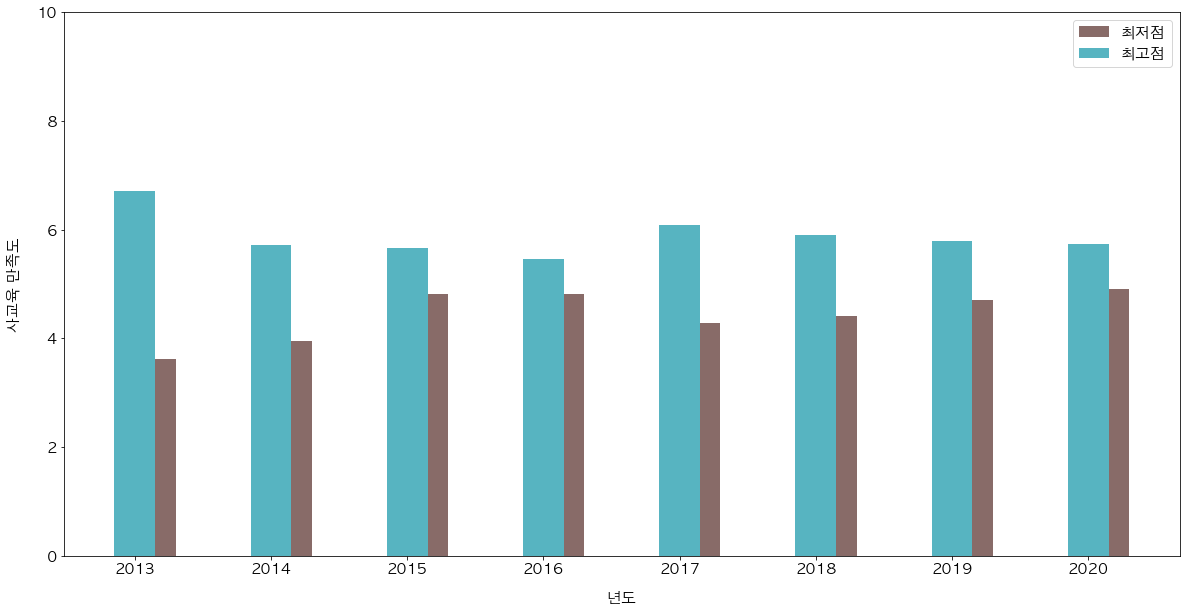

In [1134]:
plt.figure(figsize=(20,10))

plt.bar(yearD+0.15, yearmin, width = 0.3, label = '최저점', color='#886b68')
plt.bar(yearD, yearmax, label = '최고점', width=0.3, color='#57b4c1')

plt.legend()
plt.ylim(0,10)

plt.ylabel('사교육 만족도', labelpad=15)
plt.xlabel('년도', labelpad=15)
plt.savefig('1st_end_score_box.png', dpi=300)

# for i in range(0, len(yearmin)):
#     year = 2013
#     print(year+i, ' MIN ', yearmin[i])
#     print(year+i, ' MAX ', yearmax[i])
#     print(year+i, ' ---- : ', (yearmax[i] - yearmin[i]))
    


In [895]:
X[X['기간'] == 2020]['사교육 만족도'].min()

4.9

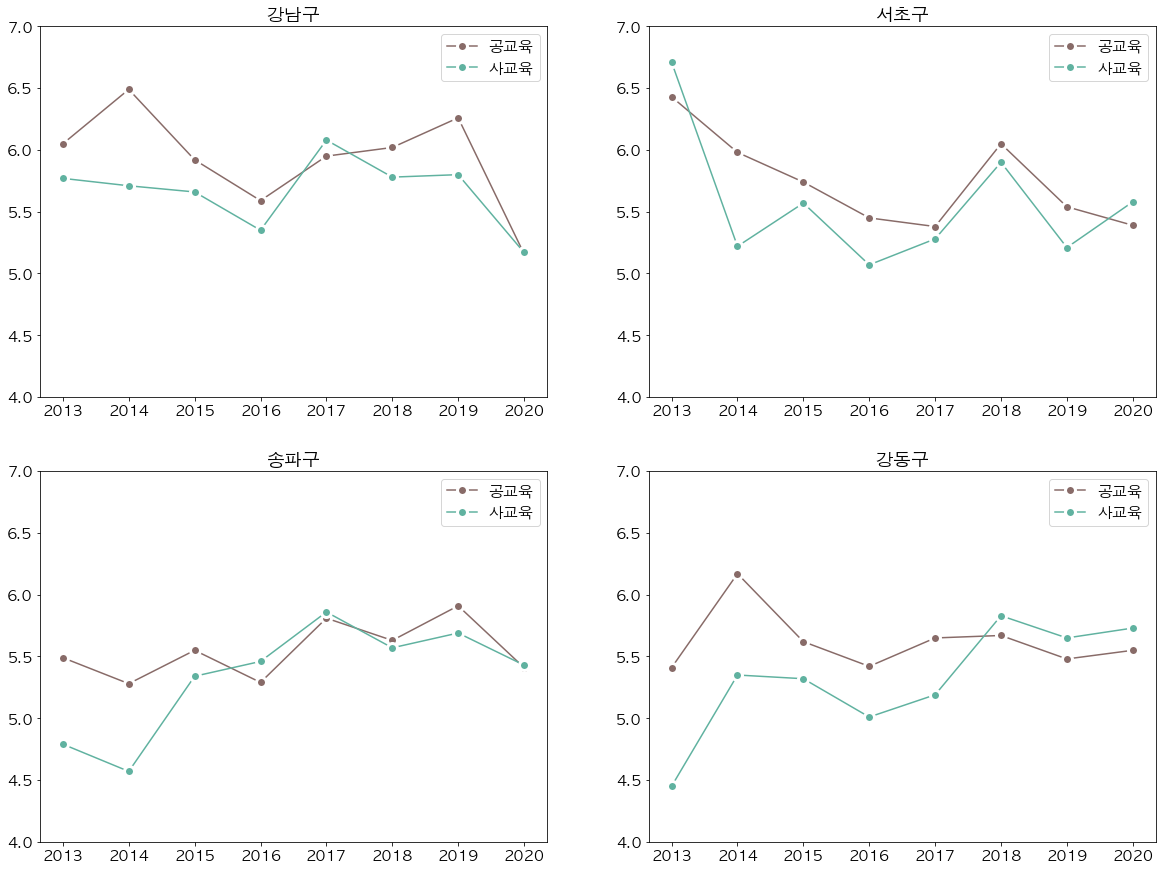

In [1135]:
filtGN = (X['자치구'] == '강남구')
filtSC = (X['자치구'] == '서초구')
filtSP = (X['자치구'] == '송파구')
filtGD = (X['자치구'] == '강동구')



fix, ax2 = plt.subplots(2,2, figsize=(20,15))

ax2[0,0].plot(X[filtGN]['기간'], X[filtGN]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax2[0,0].plot(X[filtGN]['기간'], X[filtGN]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10,c ='#60b2a0' )
ax2[0,0].set_ylim(4.0,7.0)
ax2[0,0].legend()
ax2[0,0].set_title('강남구')

ax2[0,1].plot(X[filtSC]['기간'], X[filtSC]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax2[0,1].plot(X[filtSC]['기간'], X[filtSC]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10,c ='#60b2a0' )
ax2[0,1].set_ylim(4.0,7.0)
ax2[0,1].legend()
ax2[0,1].set_title('서초구')

ax2[1,0].plot(X[filtSP]['기간'], X[filtSP]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax2[1,0].plot(X[filtSP]['기간'], X[filtSP]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10,c ='#60b2a0' )
ax2[1,0].set_ylim(4.0,7.0)
ax2[1,0].legend()
ax2[1,0].set_title('송파구')

ax2[1,1].plot(X[filtGD]['기간'], X[filtGD]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax2[1,1].plot(X[filtGD]['기간'], X[filtGD]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10,c ='#60b2a0' )
ax2[1,1].set_ylim(4.0,7.0)
ax2[1,1].legend()
ax2[1,1].set_title('강동구')

plt.savefig('top3.png', dpi=300)

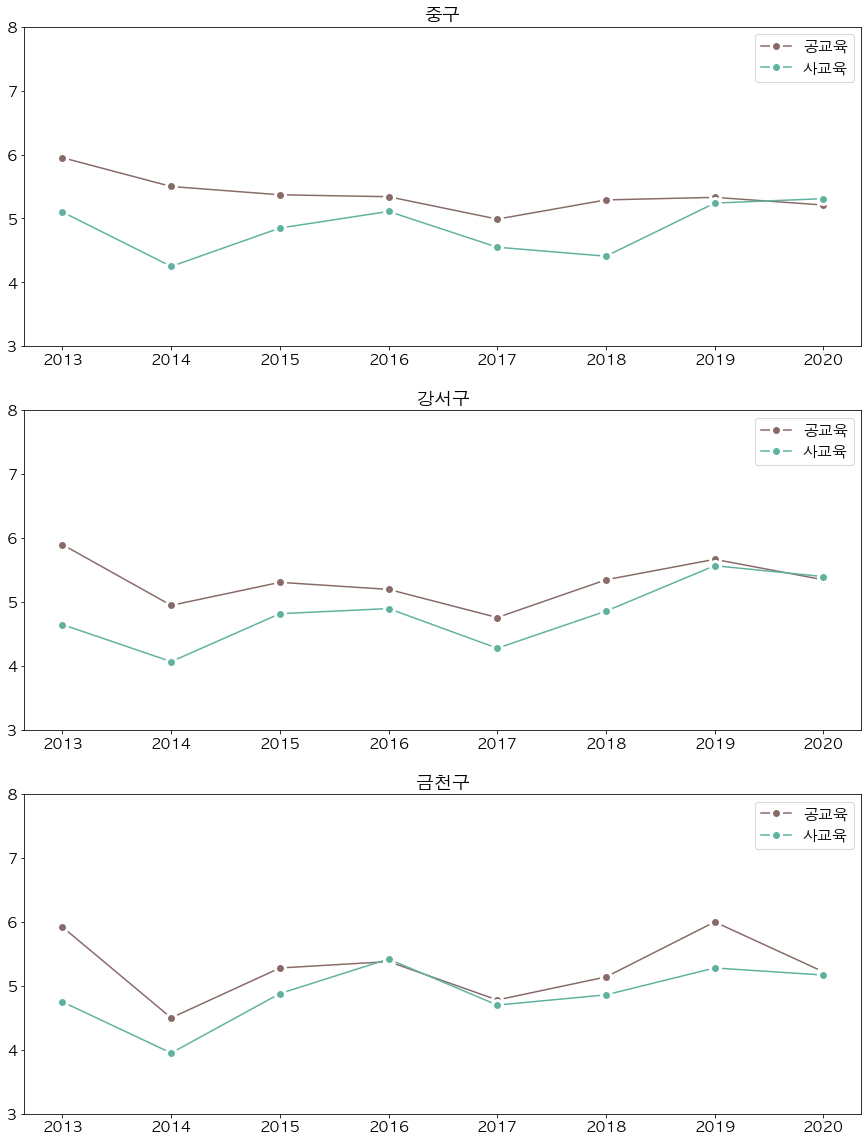

In [1136]:
filtJ = (X['자치구'] == '중구')
filtGS = (X['자치구'] == '강서구')
filtGC = (X['자치구'] == '금천구')



fix, ax3 = plt.subplots(3,1, figsize=(15,20))

ax3[0].plot(X[filtJ]['기간'], X[filtJ]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax3[0].plot(X[filtJ]['기간'], X[filtJ]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10, c ='#60b2a0' )
ax3[0].set_ylim(3.0,8.0)
ax3[0].legend()
ax3[0].set_title('중구')

ax3[1].plot(X[filtGS]['기간'], X[filtGS]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax3[1].plot(X[filtGS]['기간'], X[filtGS]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10, c ='#60b2a0' )
ax3[1].set_ylim(3.0,8.0)
ax3[1].legend()
ax3[1].set_title('강서구')

ax3[2].plot(X[filtGC]['기간'], X[filtGC]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10,c = '#886b68')
ax3[2].plot(X[filtGC]['기간'], X[filtGC]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10, c ='#60b2a0' )
ax3[2].set_ylim(3.0,8.0)
ax3[2].legend()
ax3[2].set_title('금천구')


plt.savefig('bot3.png', dpi=300)

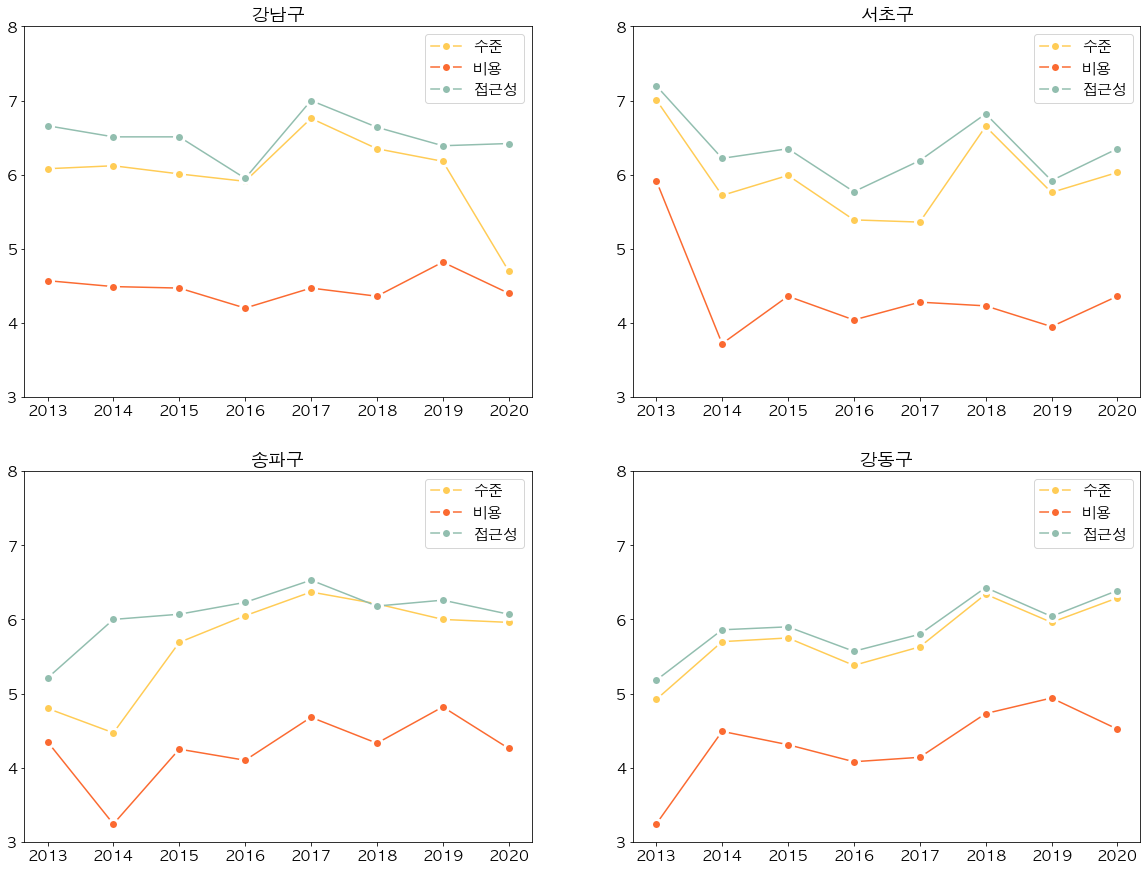

In [1139]:
filtGN = (X['자치구'] == '강남구')
filtSC = (X['자치구'] == '서초구')
filtSP = (X['자치구'] == '송파구')
filtGD = (X['자치구'] == '강동구')



fix, ax2 = plt.subplots(2,2, figsize=(20,15))

ax2[0,0].plot(X[filtGN]['기간'], X[filtGN]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax2[0,0].plot(X[filtGN]['기간'], X[filtGN]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10, c='#fb6a31')
ax2[0,0].plot(X[filtGN]['기간'], X[filtGN]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10,c= '#92beaf')
ax2[0,0].set_ylim(3.0,8.0)
ax2[0,0].legend()
ax2[0,0].set_title('강남구')

ax2[0,1].plot(X[filtSC]['기간'], X[filtSC]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax2[0,1].plot(X[filtSC]['기간'], X[filtSC]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10, c='#fb6a31')
ax2[0,1].plot(X[filtSC]['기간'], X[filtSC]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10, c= '#92beaf')
ax2[0,1].set_ylim(3.0,8.0)
ax2[0,1].legend()
ax2[0,1].set_title('서초구')

ax2[1,0].plot(X[filtSP]['기간'], X[filtSP]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax2[1,0].plot(X[filtSP]['기간'], X[filtSP]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10,c='#fb6a31')
ax2[1,0].plot(X[filtSP]['기간'], X[filtSP]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10,c= '#92beaf')
ax2[1,0].set_ylim(3.0,8.0)
ax2[1,0].legend()
ax2[1,0].set_title('송파구')

ax2[1,1].plot(X[filtGD]['기간'], X[filtGD]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax2[1,1].plot(X[filtGD]['기간'], X[filtGD]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10, c='#fb6a31')
ax2[1,1].plot(X[filtGD]['기간'], X[filtGD]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10,c= '#92beaf')
ax2[1,1].set_ylim(3.0,8.0)
ax2[1,1].legend()
ax2[1,1].set_title('강동구')

plt.savefig('top3_seg.png', dpi=300)

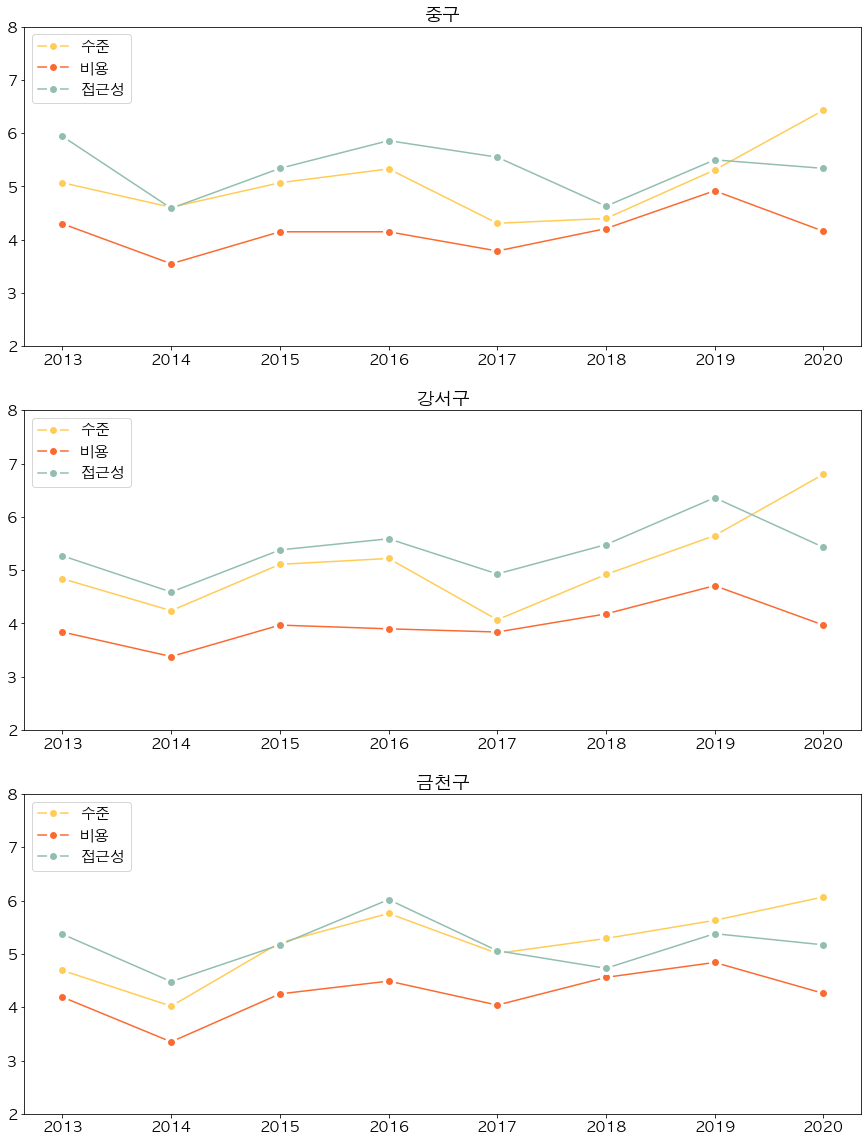

In [1140]:
filtJ = (X['자치구'] == '중구')
filtGS = (X['자치구'] == '강서구')
filtGC = (X['자치구'] == '금천구')



fix, ax3 = plt.subplots(3,1, figsize=(15,20))

ax3[0].plot(X[filtJ]['기간'], X[filtJ]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax3[0].plot(X[filtJ]['기간'], X[filtJ]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10, c='#fb6a31')
ax3[0].plot(X[filtJ]['기간'], X[filtJ]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10, c= '#92beaf')
ax3[0].set_ylim(2.0,8.0)
ax3[0].legend(loc=2)
ax3[0].set_title('중구')

ax3[1].plot(X[filtGS]['기간'], X[filtGS]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax3[1].plot(X[filtGS]['기간'], X[filtGS]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10,c='#fb6a31')
ax3[1].plot(X[filtGS]['기간'], X[filtGS]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10, c= '#92beaf')
ax3[1].set_ylim(2.0,8.0)
ax3[1].legend()
ax3[1].set_title('강서구')

ax3[2].plot(X[filtGC]['기간'], X[filtGC]['사교육 수준 만족도'], label='수준', marker='o', mec='w', mew=3, ms=10,c= '#ffcc56')
ax3[2].plot(X[filtGC]['기간'], X[filtGC]['사교육 비용만족도'], label='비용', marker='o', mec='w', mew=3, ms=10, c='#fb6a31')
ax3[2].plot(X[filtGC]['기간'], X[filtGC]['사교육 접근성 만족도'], label='접근성', marker='o', mec='w', mew=3, ms=10, c= '#92beaf')
ax3[2].set_ylim(2.0,8.0)
ax3[2].legend(loc=2)
ax3[2].set_title('금천구')


plt.savefig('bot3_seg.png', dpi=300)